# **Exploratory Data Analysis (EDA) of Selected Tech Stocks (2022-2024)**

This notebook performs exploratory data analysis (EDA) on historical stock prices of four major technology companies: Microsoft (MSFT), Apple (AAPL), Google (GOOGL), and NVIDIA (NVDA).

The data is fetched directly from Yahoo Finance using the `yfinance` Python library, covering the period from January 1, 2022, to December 31, 2024.

The analysis aims to understand price trends, volatility, and trading volume patterns for each stock, as well as to compare their performance and risk characteristics.

Key steps include:

- Downloading and inspecting stock data  
- Descriptive statistics and data quality checks  
- Visualizing price movements and trading volumes  
- Calculating daily returns and analyzing their distribution  
- Assessing volatility and identifying outliers  
- Saving important plots for reporting and further analysis  

This analysis provides insights useful for investors, analysts, and anyone interested in stock behavior over time.



In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Create reports folder if not exist
os.makedirs('reports', exist_ok=True)

# MSFT: Microsoft, AAPL: Apple, GOOGL: Google, NVDA: NVIDIA
tickers = ['MSFT', 'AAPL', 'GOOGL', 'NVDA']

labels = ['Microsoft', 'Apple', 'Google', 'NVIDIA']

# Load data from 2022 to 2024 only get Close Price
data = yf.download(tickers, start='2022-01-01', end='2025-01-01')['Close']

print("\nMissing values per ticker:")
print(data.isnull().sum())

print("\nDescriptive statistics:")
print(data.describe())

# Remove rows containing NaN values
data.dropna(inplace = True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


Missing values per ticker:
Ticker
AAPL     0
GOOGL    0
MSFT     0
NVDA     0
dtype: int64

Descriptive statistics:
Ticker        AAPL       GOOGL        MSFT        NVDA
count   753.000000  753.000000  753.000000  753.000000
mean    176.563680  131.789951  329.669791   54.391689
std      29.570501   27.283039   71.336390   42.173985
min     123.421242   82.932625  209.393280   11.214939
25%     153.871689  109.682198  265.680725   19.561007
50%     171.708893  130.745880  320.929718   41.891586
75%     190.167374  150.964615  406.484711   87.728172
max     258.396667  196.196259  464.002502  148.856064


# **Closing Prices Over Time (2022-2024)**

This chart shows the historical closing prices of Microsoft, Apple, Google and NVIDIA for the 2 years 2022 to 2024.  
It helps visualize the overall trend and growth patterns of these tech stocks.

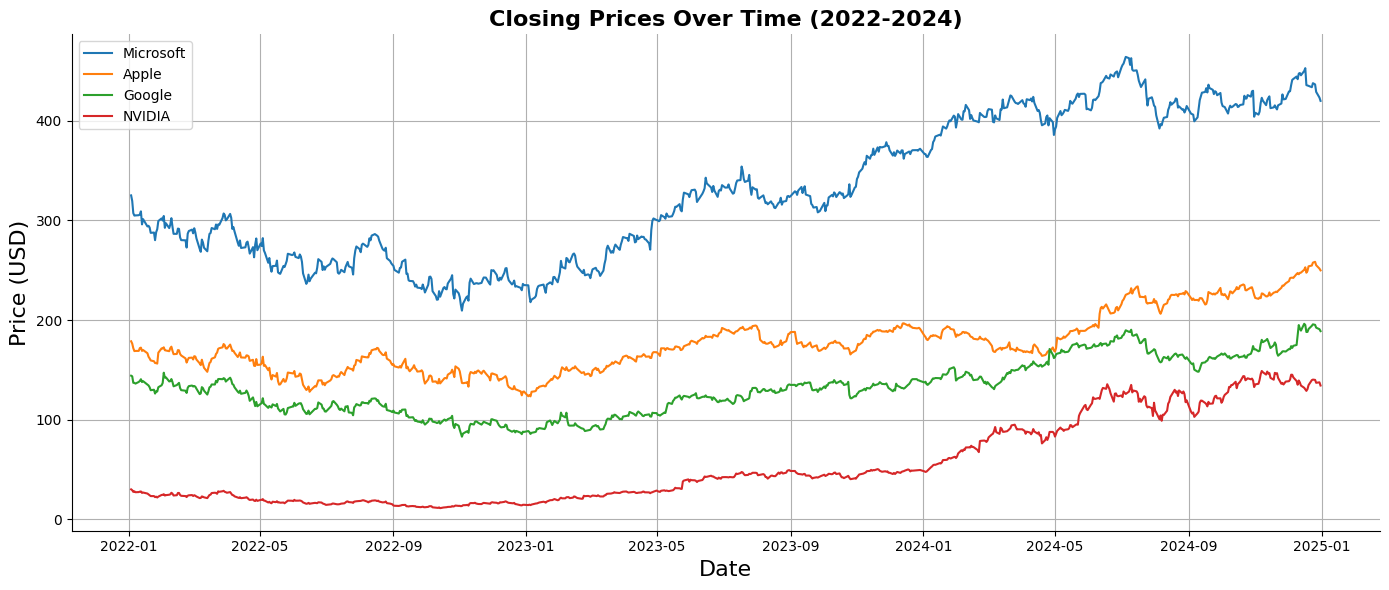

In [3]:
# Analyze closing price trends over time 2022 to 2024
plt.figure(figsize = (14, 6))
for ticker, label in zip(tickers,  labels):
  plt.plot(data[ticker], label = label)
plt.legend()
plt.title("Closing Prices Over Time (2022-2024)", fontsize = 16, fontweight = 'bold')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Price (USD)', fontsize = 16)
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.savefig('reports/closing_prices_2022_2024.png')
plt.show()

## 🔍 Insight - Close Price Trend
- All four stocks show long-term price growth trends from early 2022 to late 2024. However, the volatility and absolute price growth trajectories vary significantly between companies over this period.
- **Microsoft:** leads in absolute value and steady growth. Microsoft (blue) maintains its position as the stock with the highest absolute closing price throughout the period. Microsoft's price path shows a fairly smooth and stable growth trend, with less "sharp" price fluctuations than NVIDIA. This may appeal to long-term investors looking for stability at high prices.
- **Apple:** and **Google:** have shown more stable growth but at a lower price. Apple (orange) and Google (green) show smoother and more stable growth curves than NVIDIA. Despite being at a lower absolute price than Microsoft, their growth trends are quite consistent. In particular, Google seems to have flat or slower growth periods than Apple at certain times. These stocks may appeal to investors looking for stability at a lower price than Microsoft.
- **NVIDIA:** has the most impressive price growth and high volatility. NVIDIA (red) shows the most notable absolute price growth of the group. Starting from the lowest price and ending with an impressive spike, NVIDIA's price path also shows strong volatility (clear jumps and declines), reflecting the company's high risk profile and profit potential.


# **Daily Log Returns (May - Aug 2024)**

This chart shows the daily natural logarithm returns of each stock.

Daily log returns are the natural logarithm returns of the price of a stock (or other asset) between two consecutive points in time (usually daily), used to analyze the price change of an asset.

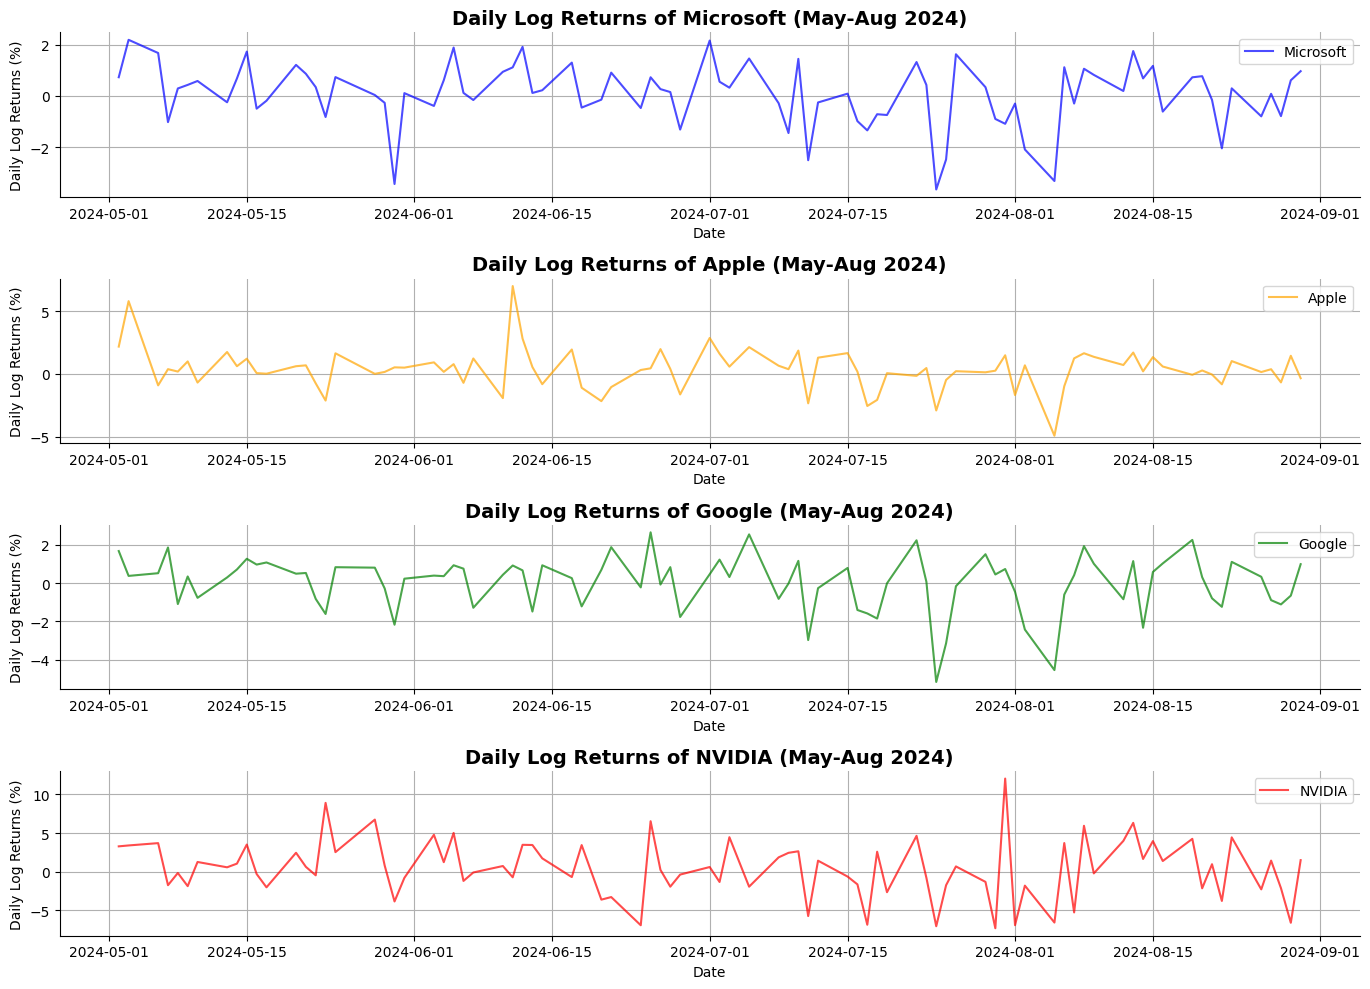

In [4]:
# Filter data from 2024-05-01 to 2024-08-31
data_recent = data.loc['2024-05-01':'2024-08-31']
# Calculate daily log return
# data_recent.shitf: shifting all values ​​in the data_recent series back one position
# dropna: Remove all rows (or elements) containing NaN values ​​from the result series. This ensures that daily_log_return contains only valid return values
daily_log_return = np.log(data_recent / data_recent.shift(1)).dropna()
colors = {
    'MSFT': 'blue',
    'AAPL': 'orange',
    'GOOGL': 'green',
    'NVDA': 'red'
}
plt.figure(figsize = (14, 10))
for i, (ticker, label) in enumerate(zip(tickers, labels), 1):
    plt.subplot(len(tickers), 1, i)
    # daily_log_return[ticker] multiple 100 to convert %
    plt.plot(daily_log_return[ticker] * 100, label = label, color = colors[ticker], alpha=0.7)
    plt.title(label, fontsize=14, fontweight='bold')
    plt.title(f'Daily Log Returns of {label} (May-Aug 2024)', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Daily Log Returns (%)')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    sns.despine()
plt.tight_layout()
plt.savefig('reports/daily_log_returns_may_aug_2024.png')
plt.show()

## 🔍 Insight - Comparative Price Movement  
- **Microsoft:** and **Google:** tend to move in sync. Microsoft (blue) and Google (green) charts tend to move in the same direction (up or down at the same time), especially during some periods. This may indicate some correlation in their reactions to general market or industry factors.
- **Apple:** has relatively stable daily log returns. Apple's chart (orange) shows relatively stable and less extreme daily log return swings than NVIDIA and Google. Apple's yields have generally been concentrated closer to zero, suggesting a lower risk profile in terms of daily volatility than NVIDIA and Google over this period.
- **NVIDIA:** has the highest daily volatility. NVIDIA's chart (red) shows the most extreme swings and more frequent extreme positive and negative returns than the other stocks. This confirms that NVIDIA has the highest daily log return volatility in the group, with great risks and opportunities in each trading session.

# **Cumulative Log Returns (May - Aug 2024)**
The chart shows the cumulative log returns of four stocks: Microsoft, Apple, Google, and NVIDIA.

Cumulative log return represents the total logarithmic cumulative return of an asset over a period of time.


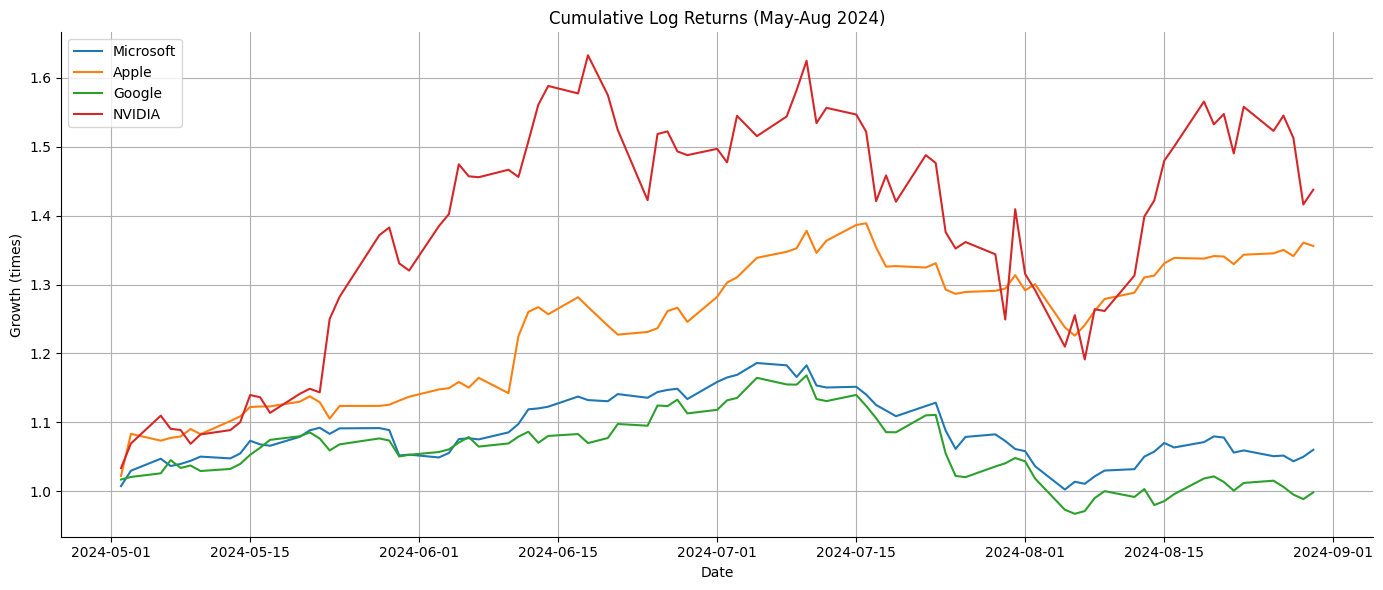

In [5]:
# Calculate cumulative log return from 2024-05-01 to 2024-08-31
# cumsum: calculate the cumulative sum of the values ​​in the daily_log_return series
cumulative_log_returns = daily_log_return.cumsum()
cumulative_growth = np.exp(cumulative_log_returns)
plt.figure(figsize=(14, 6))
for ticker, label in zip(tickers, labels):
    plt.plot(cumulative_growth[ticker], label = label)
plt.title("Cumulative Log Returns (May-Aug 2024)")
plt.xlabel("Date")
plt.ylabel("Growth (times)")
plt.legend()
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.savefig('reports/cumulative_log_returns_may_aug_2024.png')
plt.show()

## 🔍 Insight - Performance & Risk Profile
- **NVIDIA:** shows the highest cumulative growth performance with a steeper curve and the highest peak among the stocks. At the same time, NVIDIA's curve also shows the most pronounced volatility (undulation), reflecting the high profit potential accompanied by high risk in cumulative price fluctuations.
- **Apple:** has maintained a smooth and steady cumulative growth trend, achieving the second highest growth rate. Apple's curve is relatively smooth and has less volatility than NVIDIA's, indicating consistency and a lower risk profile in cumulative performance.
- **Microsoft:** shows very low volatility with an extremely smooth and stable cumulative growth curve. It maintains a fairly consistent positive growth momentum, reflecting its low risk profile and stable performance, although the overall growth is more modest than NVIDIA and Apple.
- **Google:** shows the least consistent cumulative performance in the group. Google's curve shows slow growth, and it is worth noting that there have been times when the cumulative value has fallen below its initial starting level (ratio below 1). This shows significant risk in the ability to maintain positive cumulative growth and is more susceptible to long-term value decline compared to other stocks.

# **Distribution of Daily Log Returns**

Kernel Density Estimation (KDE) plots provide a smooth estimate of the probability distribution of daily returns.

This helps understand the likelihood of different return magnitudes and the presence of extreme values.

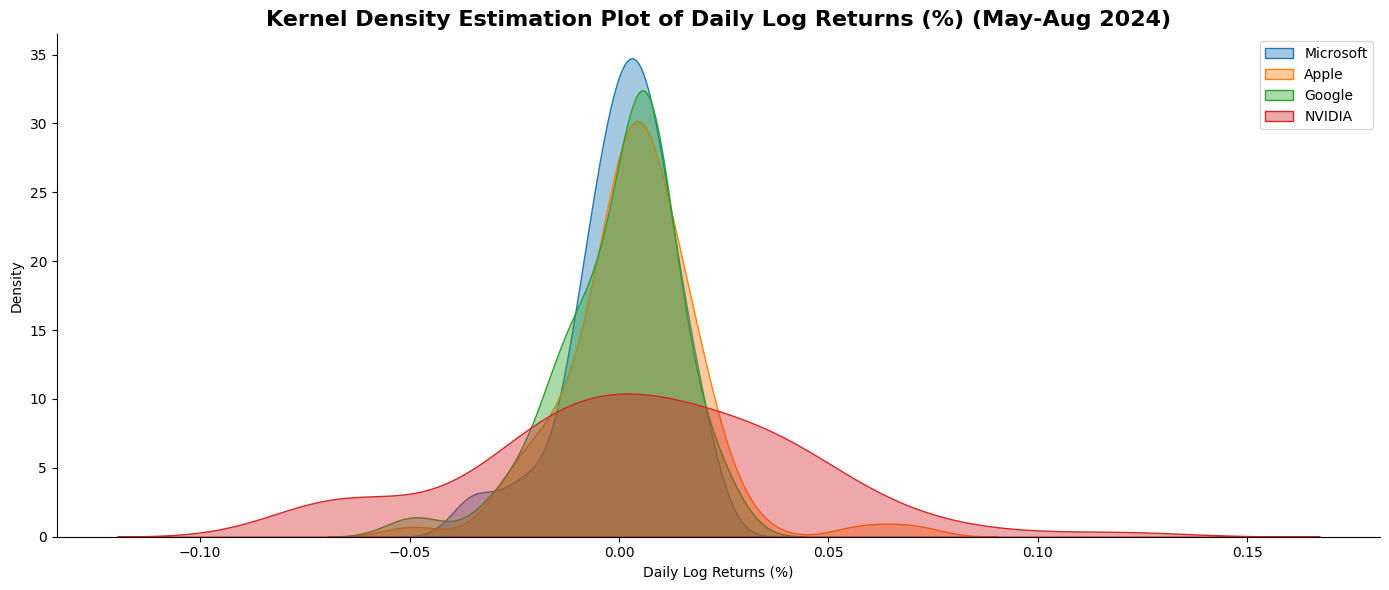

In [6]:
# Daily Log Return Distribution (Kernel Density Estimation Plot) from 2024-05-01 to 2024-08-31
plt.figure(figsize=(14, 6))
for ticker, label in zip(tickers, labels):
    sns.kdeplot(daily_log_return[ticker], label = label, fill = True, alpha = 0.4)

plt.title('Kernel Density Estimation Plot of Daily Log Returns (%) (May-Aug 2024)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Daily Log Returns (%)')
plt.ylabel('Density')
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig('reports/kde_daily_log_returns_may_aug_2024.png')
plt.show()

## 🔍 Insight - Daily Log Return Distribution & Volatility
- **Microsoft:** has most stable and concentrated. Microsoft's curve (blue) is the tallest and narrowest. This indicates that Microsoft's daily log returns are most tightly clustered around zero, reflecting the lowest volatility and highest stability in the stocks.
- **Apple:** has low volatility, third most stable, more upside potential: Apple's curve (orange) has the third highest height and is the third widest curve. Notably, its positive returns are wider and appear to be slightly longer than Google's, although overall volatility is still lower than NVIDIA's. This suggests that Apple is highly stable but still has more significant upside days than Google.
- **Google:**
  - Google has average volatility with notable downside risk. Google's curve (green) is the second tallest and second widest of the group. Notably, its wider spread is evident in the negative returns. This implies that Google has higher daily return volatility and downside risk (as indicated by its longer negative tail) than Microsoft and Apple.
  - Google slightly negative shift. The majority of Google's distribution is slightly negative, reinforcing the idea that GOOGL accumulates slowly and sometimes dips below 1 (i.e., has more negative days than the average positive expectation).
- **NVIDIA:**
 - NVIDIA has the highest volatility. NVIDIA's curve (red) is the flattest and widest, especially at the two "tails" of the distribution (the extreme negative and positive returns), indicating that NVIDIA has the highest daily return volatility of the stock. This means that NVIDIA has more frequent days with significant price increases or decreases than the other stocks.
 - NVIDIA has the widest range of returns. The range that NVIDIA's distribution covers on the X-axis (Daily Log Returns) is the widest, ranging from about -0.10 to 0.15 (i.e. -10% to +15% daily log returns), confirming the high level of risk and profit opportunities in a single day.


# **7-Day Rolling Volatility**

The chart shows the 7-day moving average volatility of each stock.

Volatility measures the degree of variation in stock profits over time.

Here, a 7-day rolling window is used to smooth daily fluctuations and observe trends in risk levels.

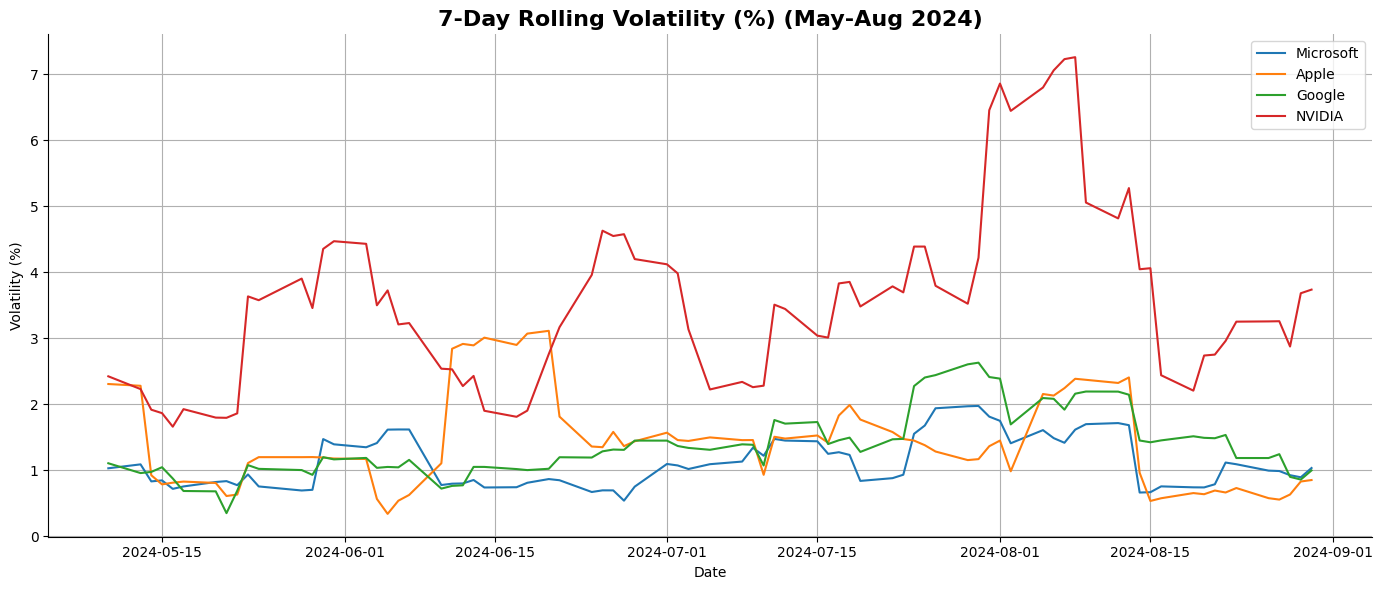

In [7]:
# Compute 7-day rolling volatility (standard deviation) from 2024-05-01 to 2024-08-31
# Multiply by 100 to express volatility as a percentage
rolling_volatility = daily_log_return.rolling(window=7).std() * 100

# Plot rolling volatility for each stock
plt.figure(figsize=(14, 6))
for ticker, label in zip(tickers, labels):
    plt.plot(rolling_volatility[ticker], label = label)

plt.title("7-Day Rolling Volatility (%) (May-Aug 2024)", fontsize = 16, fontweight = 'bold')
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.savefig('reports/rolling_volatility_may_aug_2024.png')
plt.show()

## 🔍 Insight - 7-Day Rolling Volatility & Risk Profiles (May-Aug 2024)
- **NVIDIA:** Most volatile and most unstable. NVIDIA's performance line (red) remained the highest of the four stocks for most of the period, regularly exceeding the 3% mark and having sharp peaks above 7% (e.g. early August). This shows that NVIDIA has the highest and most volatile short-term volatility, reflecting the large market risk in each 7-day period.
- **Apple:** High average volatility, with periods of spikes. Apple's performance line (orange) is also higher on average than Microsoft and Google. It also has occasional periods of less than 1%, but regularly exceeds 3% in some periods (e.g. early June and mid-August). This shows that Apple has high average volatility and short-term periods of significant spike risk.
- **Google:** Average volatility, with moderate swings. Google's chart (green) is average. It has occasional periods of less than 1%, but also a few times it exceeds 2%. This shows that Google is average volatility, relatively more stable than NVIDIA but still has smaller volatility spikes than Microsoft and Apple.
- **Microsoft:** Lowest and most stable volatility. Microsoft's performance line (blue) has consistently been the lowest in the group, with occasional swings below 1% and no more than 2% most of the time. This confirms that Microsoft has the lowest and most stable short-term volatility, implying that it is the lowest-risk option in the group.

# **Stock Volatility Comparison**

The chart shows the overall volatility (standard deviation of daily log returns) of each stock  from May to August 2024.

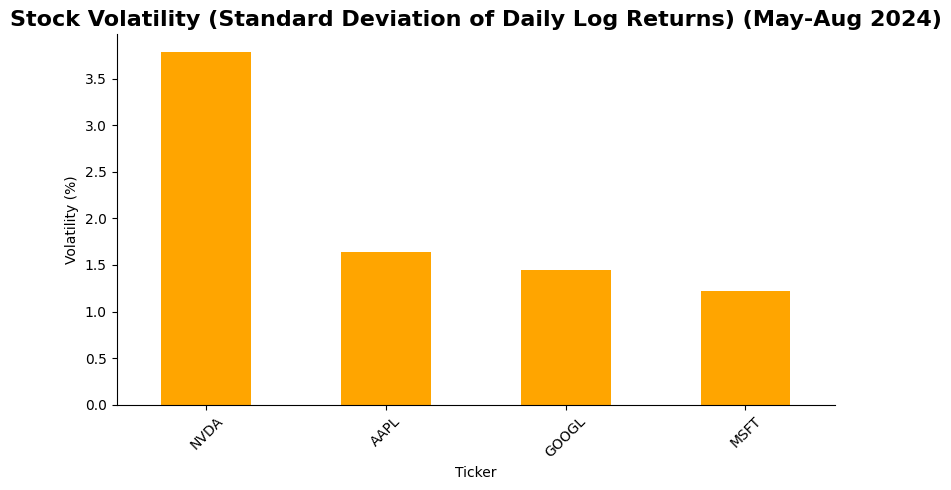

In [8]:
# Stock Volatility from 2024-05-01 to 2024-08-31
# multiple 100 to convert from decimal to %
volatility = daily_log_return.std() * 100
volatility.sort_values(ascending=False).plot(
    kind='bar', color='orange', figsize=(8, 5)
)
plt.title("Stock Volatility (Standard Deviation of Daily Log Returns) (May-Aug 2024)", fontsize = 16, fontweight = 'bold')
plt.ylabel("Volatility (%)")
plt.xticks(rotation = 45)
sns.despine()
plt.tight_layout()
plt.savefig('reports/volatility_bar_chart_may_aug_2024.png')
plt.show()

## 🔍 Insight - Stock Volatility Ranking (May-Aug 2024)
- **NVIDIA (NVDA):** Highest Volatility. NVIDIA (NVDA) stock has the highest volatility, at around 3.7%. This shows that NVIDIA's daily returns are the most widely dispersed from its mean, implying the highest risk among the stocks analyzed.
- **Apple (AAPL):** Second highest volatility. Has the second most significant volatility, at around 1.6%. Although significantly lower than NVIDIA, it is still higher than Google and Microsoft, indicating that Apple has a slightly higher level of volatility risk than the other two stocks.
- **Google (GOOGL):** Medium volatility. Google has average volatility, with a value of about 1.45%. It falls between Apple and Microsoft, representing a moderate level of volatility risk.
- **Microsoft (MSFT):** Lowest volatility: Microsoft has the lowest volatility, with a value of about 1.25%. This shows that Microsoft's daily returns are the least dispersed, implying that it is the most stable stock and has the lowest volatility risk in the group.
- **NVIDIA (NVDA)** and **Apple (AAPL)** with high volatility often carry greater risk — prices are volatile, and profits can fluctuate.

- **Google (GOOGL)** and  **Microsoft (MSFT)** with low volatility are more stable, suitable for investors who prefer safety.


# **Correlation Matrix of Daily Log Returns**

The chart shows correlation coefficients between the daily returns of Apple, Google, Microsoft, and NVIDIA stocks over the period from May to August 2024.

The correlation matrix provides important insights into whether pairs of stocks move in the same or opposite directions, which is important for building a diversified portfolio.

High positive correlation means stocks tend to move in the same direction.

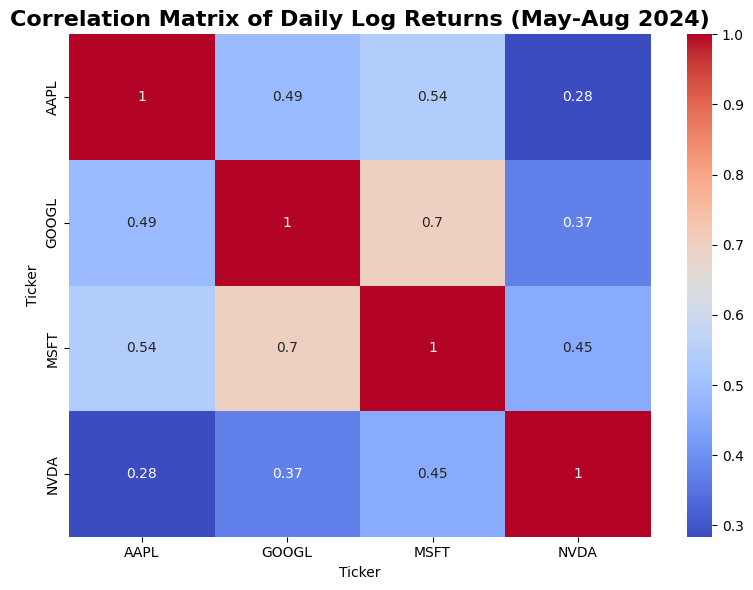

In [9]:
correlation = daily_log_return.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Log Returns (May-Aug 2024)', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.savefig('reports/correlation_heatmap_may_aug_2024.png')
plt.show()

## 🔍 Insight - Correlation of Daily Log Returns and Portfolio Diversification
- **Google** and **Microsoft** - Strongest Correlation. The **GOOGL** - **MSFT** pair has the highest correlation coefficient of 0.70. This indicates that the daily returns of Google and Microsoft have a very strong synchronization relationship, often moving very close to each other. This makes sense since both are large technology companies with a strong presence in the software and cloud services segments.
- **NVIDIA**: Lowest correlation with other stocks. **NVIDIA (NVDA)** shows the lowest correlation coefficient with other stocks:
 - **NVDA**-**AAPL**: 0.28
 - **NVDA**-**GOOGL**: 0.37
 - **NVDA**-**MSFT**: 0.45
- **NVIDIA** can be combined with other stocks to diversify the portfolio, helping to reduce the overall downside risk of the portfolio.